In [1]:
#!/usr/bin/env python
# coding: utf-8

#specs:
    M/M/1 has infinite buffer while M/M/1/K has only size of K packets
    
    𝐹(𝑥) = 1 − 𝑒^(−𝜆)
    𝒙 = − (𝟏/𝝀) 𝒍𝒏(𝟏 − 𝑼)
    where U is a uniformly generated number and 𝑥 is the exponential random variable

In [2]:
# • λ = Average number of packets generated /arrived (packets per second)
# • L = Average length of a packet in bits.
# • α = Average number of observer events per second
# • C = The transmission rate of the output link in bits per second.
# • ρ = Utilization of the queue (= input rate/service rate = L λ/C)
# • E[N] = Average number of packets in the buffer/queue
# • PIDLE = The proportion of time the server is idle, i.e., no packets in the queue nor a packet is being transmitted.
# • PLOSS = The packet loss probability (for M/M/1/K queue). It is the ratio of the total number of packets lost due to
# buffer full condition to the total number of generated packets.

In [3]:
#simulation Time T
#queue events with
# ----- Packet arrival
# ----- Packet departure
# ----- Observer


In [32]:
from random import seed
from random import random
import numpy as np
import math
import matplotlib.pyplot as plt


seed(358)
mil = C_rate = 1000000
lambda_alpha_factor = 5

In [5]:
#Q1 1000 erv with lamba = 75
# get mean and variance of the 1000 rv

def exp_rad_var(lambda_value):
    return -1 * (math.log(1 - random())) / lambda_value

def mean_variance(data):
    mean = sum(data) / len(data)
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / len(data)
    return mean,variance

def mean_variance_calculator(total_count, lambda_value):
    rad_list = [exp_rad_var(lambda_value) for _ in range(total_count)]
    expected_mean = 1/lambda_value
    expected_variance = expected_mean/lambda_value
    mean,variance = mean_variance(rad_list)
    return mean,variance,expected_mean,expected_variance

In [6]:
exp_rad_var(1/2000)

2894.5269161164233

## Q1

In [7]:
m,v,em,ev = mean_variance_calculator(1000,75)

In [8]:
print("mean:        ",m , "   variance:        ", v)
print("expect mean: ",em , "   expect variance: ", ev)


mean:         0.013663521938766698    variance:         0.00019549101399417157
expect mean:  0.013333333333333334    expect variance:  0.00017777777777777779


## Q2-3-4 M/M/1 Queue

In [10]:
def infinite_buffer_event_list(Time,lambda_value,L=2000):
    #fix observer rate for all queue
    alpha = lambda_alpha_factor * lambda_value
    #initialization of time stream:
    departureStream = 0 
    arrivalStream = 0
    observerStream = 0
    
    #lists to hold times
    departureStream_list = []
    arrivalStream_list = []
    observerStream_list = []
    
    #get data packets running ...
    while observerStream < Time:
        observerStream = exp_rad_var(alpha) + observerStream
        observerStream_list.append(observerStream)
    while arrivalStream < Time:
        arrivalStream = exp_rad_var(lambda_value) + arrivalStream
        packet_size = exp_rad_var(1/L)
        observerStream = packet_size/C_rate
        
        arrivalStream_list.append(arrivalStream)
        #the first packet arrival T is d
        # If the queue is idle,then the departure time of packet pkti 
        # will be its arrival time plus its transmission time (service time)
        departureStream = arrivalStream + observerStream if(arrivalStream > departureStream) else departureStream + observerStream
        departureStream_list.append(departureStream)
    
    event_list = []
    for d in departureStream_list:
        event_list.append(("Departure", d))
    for a in arrivalStream_list:
        event_list.append(("Arrival", a))
    for o in observerStream_list:
        event_list.append(("Observer", o))
    event_list.sort(key=lambda tup: tup[1], reverse=False)
    return event_list,departureStream_list,arrivalStream_list,observerStream_list

def infinite_buffer_calculation(data):
    a_c = 0 
    d_c = 0
    o_c = 0 
    idle_c = 0
    packet_c = 0
    avg_packet = []
    for key in data:
        if(key[0] == 'Arrival'):
            a_c = a_c + 1
        elif(key[0] == 'Departure'):
            d_c = d_c + 1
        elif(key[0] == 'Observer'):
            o_c = o_c + 1
            packets_in_buffer = a_c - d_c
            if(packets_in_buffer == 0):
                idle_c = idle_c + 1
            else:
                avg_packet.append(packets_in_buffer)
                
    p_idle = idle_c / o_c
    e_n = sum(avg_packet)/len(avg_packet)
    return p_idle, e_n
                
    
    
        

In [30]:
##### with infinite buffer 
## due to the accuracy of the adding of decimals, we hardcode the sequence
#https://stackoverflow.com/questions/588004/is-floating-point-math-broken
rho_list = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

def queue_with_infinite_buffer(Time,L=2000,C=C_rate):
    # start processing
    round_index = 0
    total_avg = []
    total_p_idle = []
    for rho in rho_list:
        round_index = round_index + 1 
        # ---------- getting lambda value
        lambda_value = rho / L * C
        print("PROCESS # ", round_index, "   rho: ", rho, "   lambda: ", lambda_value)
        eve,_,_,_ = infinite_buffer_event_list(Time,lambda_value,L)
        pidle,e_n = infinite_buffer_calculation(eve)
        print("P idle: ", pidle, "  E[N]: ", e_n )
        total_avg.append(e_n)
        total_p_idle.append(pidle)
        
    return total_avg,total_p_idle
#         m,v,em,ev = mean_variance_calculator(1000,lambda_value)
#         print("mean:        ",m , "   variance:        ", v)
#         print("expect mean: ",em , "   expect variance: ", ev)
        # ---------- getting departure time value
        
        
        


In [34]:
EN,PIDLE = queue_with_infinite_buffer(1000)

PROCESS #  1    rho:  0.25    lambda:  125.0
P idle:  0.7475702099108598   E[N]:  1.3354533718104495
PROCESS #  2    rho:  0.35    lambda:  175.0
P idle:  0.6488875429955776   E[N]:  1.5416673447136744
PROCESS #  3    rho:  0.45    lambda:  225.0
P idle:  0.5484445382945329   E[N]:  1.817665956046331
PROCESS #  4    rho:  0.55    lambda:  275.0
P idle:  0.4521260402236818   E[N]:  2.205203637654322
PROCESS #  5    rho:  0.65    lambda:  325.0
P idle:  0.3491271759068676   E[N]:  2.862893062734046
PROCESS #  6    rho:  0.75    lambda:  375.0
P idle:  0.24550737194329506   E[N]:  4.072569126248742
PROCESS #  7    rho:  0.85    lambda:  425.0
P idle:  0.1486243985388114   E[N]:  6.855969819491395
PROCESS #  8    rho:  0.95    lambda:  475.0
P idle:  0.05250367661001808   E[N]:  20.172405941170897


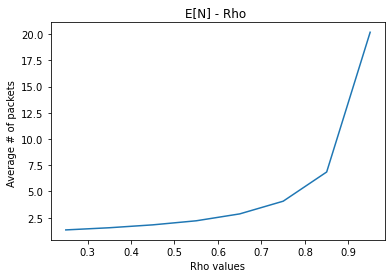

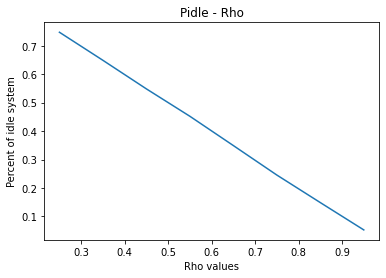

In [38]:
plt.title("E[N] - Rho ")
plt.plot(rho_list, EN)
plt.xlabel('Rho values')
plt.ylabel('Average # of packets ')
plt.show()
plt.close()


plt.title("Pidle - Rho")
plt.xlabel('Rho values')
plt.ylabel('Percent of idle system')
plt.plot(rho_list, PIDLE)
plt.show()
plt.close()